
# Basic Overview
The objective is to build go through data and do more exploratory data analysis with seaborn(inspired by https://www.kaggle.com/aashita/xgboost-model-with-minimalistic-features/notebook)

Comments/criticisms/appreciations are greatly accepted and appreciated. Do not be shy and send me an email at babinu@gmail.com !

Source of data : https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("../input/train.csv")

In [3]:
import seaborn as sns

In [4]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [5]:
train_data['Survived'].unique()

array([0, 1])

### 1. Visualization of how gender affects survival rate
We show visuals of how gender affects the surivorship of a passenger using multiple methods.


#### Using matplotlib

In [6]:
gender_grouping = train_data['Survived'].groupby([train_data['Sex']]).mean()

Text(0,0.5,'Survived')

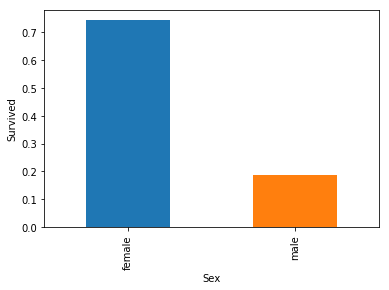

In [7]:
fig, ax = plt.subplots(1, 1)
gender_grouping.plot(kind='bar', ax=ax)
ax.set_xlabel(xlabel='Sex')
ax.set_ylabel(ylabel='Survived')


#### Using seaborn

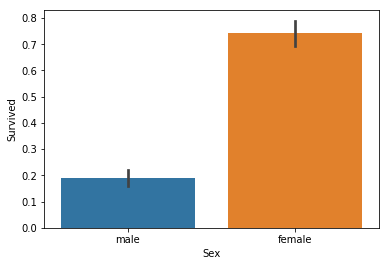

In [8]:
sns.barplot(x='Sex', y='Survived', data=train_data)

 ### 2. Visualization of how pclass affects survival rate
We show visuals of how passenger class affects the surivorship of a passenger using multiple methods.


#### Using matplotlib

Text(0.5,1,'Survived vs Pclass')

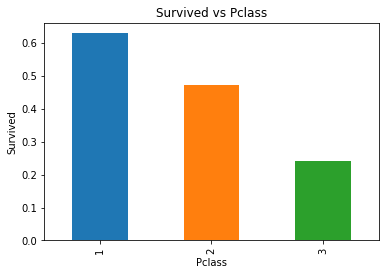

In [9]:
pclass_grouping = train_data['Survived'].groupby([train_data['Pclass']]).mean()
fig, ax = plt.subplots(1,1)
pclass_grouping.plot(kind='bar', ax=ax)
ax.set_ylabel(ylabel='Survived')
ax.set_title('Survived vs Pclass')

#### Using seaborn

Text(0.5,1,'Survived vs Pclass')

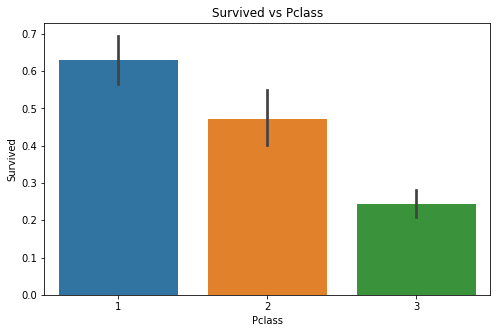

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=train_data, ax=ax)
ax.set_title('Survived vs Pclass')

### Combining visualizations for pclass and sex
Here we try to effects of both of these and visualize the same

#### Using matplotlib

In [11]:
pclass_sex_grouping = train_data['Survived'].groupby([train_data['Pclass'], train_data['Sex']]).mean()

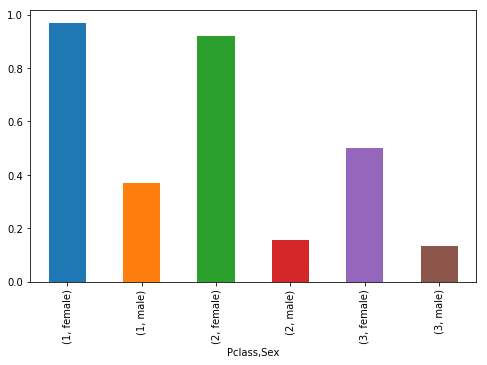

In [12]:
fig,ax = plt.subplots(1,1, figsize=(8,5))
pclass_sex_grouping.plot(kind='bar', ax=ax, stacked=True)

#### Using seaborn

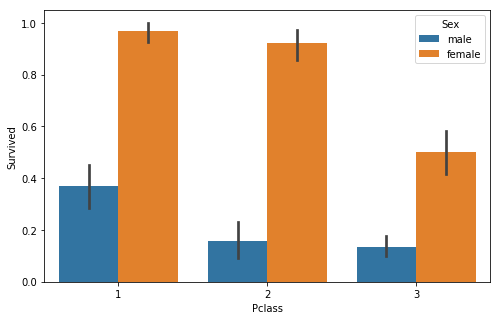

In [13]:
fig, ax = plt.subplots(1,1 , figsize=(8,5))
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=train_data, ax=ax)

There looks to be a significant disparity between the survival rates of specific gender according to the specific class, which they are in. This is explored more in the graphs below.

Text(0.5,1,'Point plot showing relationship between Pclass and Survived')

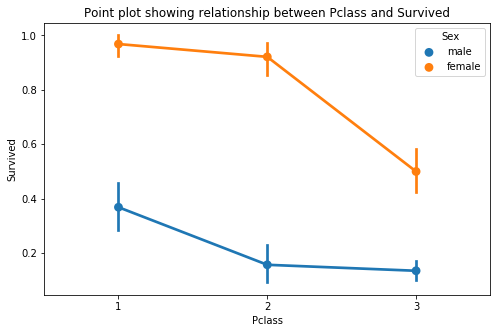

In [14]:
fig, ax = plt.subplots(1,1 , figsize=(8,5))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_data, ax=ax)
ax.set_title('Point plot showing relationship between Pclass and Survived')

This is explored in a much better manner, when we plot 'Sex' vs 'Survived' and segregate it by Pclass.

Text(0.5,1,'Point plot showing relationship between Pclass and Survived')

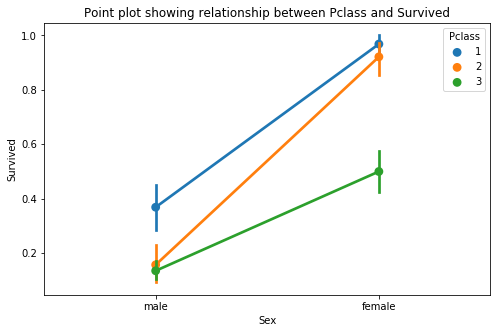

In [15]:
fig, ax = plt.subplots(1,1 , figsize=(8,5))
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=train_data, ax=ax)
ax.set_title('Point plot showing relationship between Pclass and Survived')

### Explore the fare paid within each class by those who survived and those who did not.

The first stab : How much did the fares differ depending on whether the person survived or not .

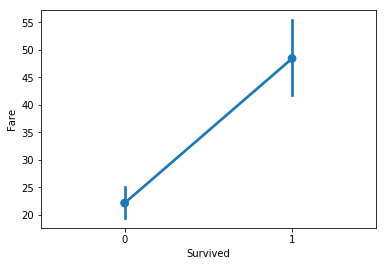

In [16]:
sns.pointplot(x='Survived', y='Fare', data=train_data)

Exploring the fares per class (depending on whether the person survived or not)

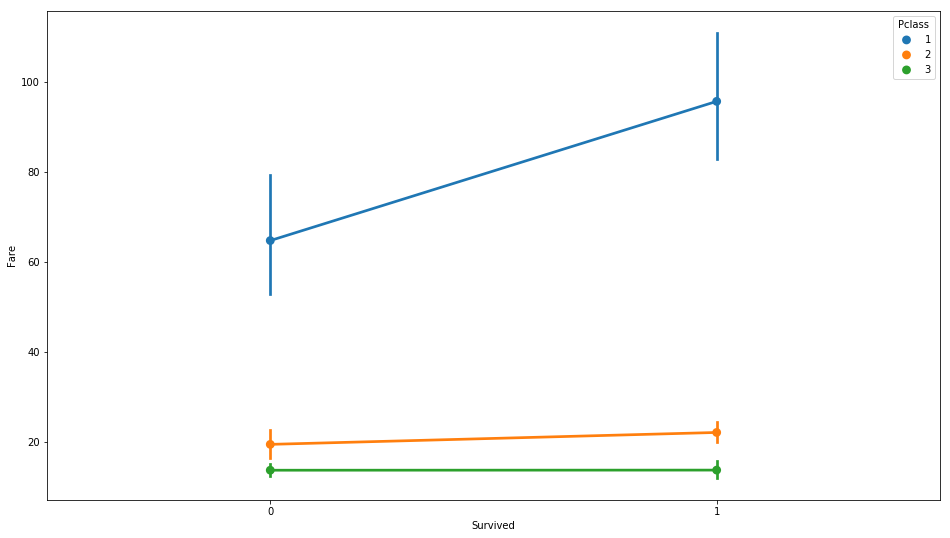

In [17]:
# Modifying since we want to do it per class.
fig, ax = plt.subplots(1,1 , figsize=(16,9))
sns.pointplot(x='Survived', y='Fare', hue='Pclass', data=train_data, ax=ax)

The effect look to be more pronounced for first class. Anyways, since let us repeat the same analysis using median instead of mean.

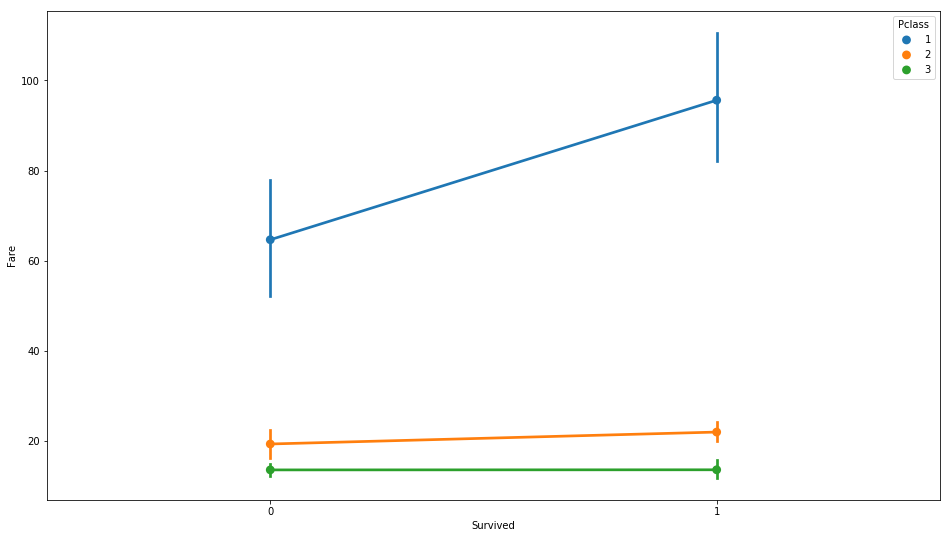

In [24]:
# Modifying since we want to do it per class.
fig, ax = plt.subplots(1,1 , figsize=(16,9))
sns.pointplot(x='Survived', y='Fare', hue='Pclass', data=train_data, ax=ax)

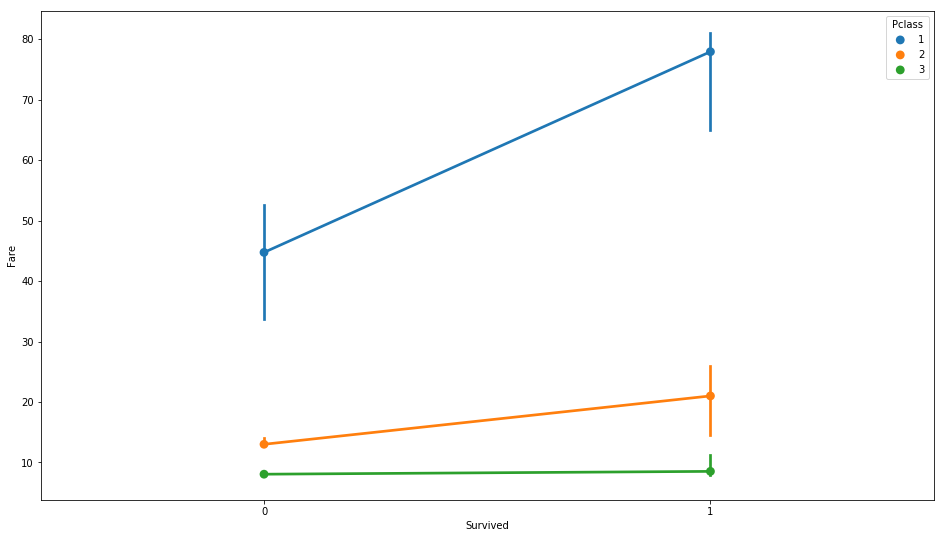

In [23]:
# Modifying since we want to do it per class.
from numpy import median
fig, ax = plt.subplots(1,1 , figsize=(16,9))
sns.pointplot(x='Survived', y='Fare', hue='Pclass', data=train_data, ax=ax, estimator=median)

Thus, we see that fare does not look to have affected much for the third class passengers, a little for the second class passengers and was much pronounced for the first class ones.

Let us ignore class for a moment see how much fares differ with gender alone.

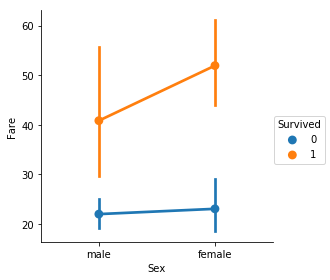

In [34]:
sns.factorplot(x='Sex', y='Fare', hue='Survived', data=train_data)

It is clear that females who survived, in general paid higher fares.

Let us delve into it further with some other plots as well.

### BoxPlot (http://www.physics.csbsju.edu/stats/box2.html)

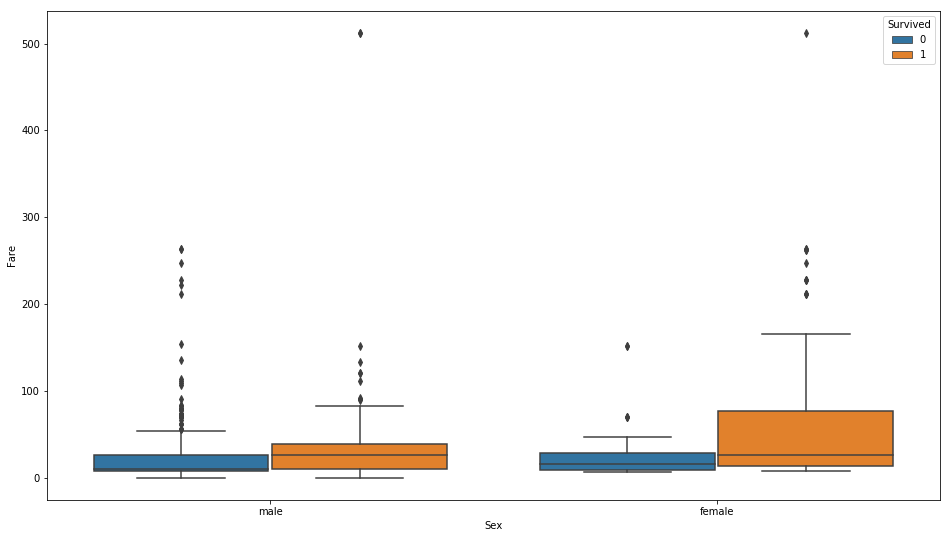

In [37]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))
sns.boxplot(x='Sex', y='Fare', hue='Survived', data=train_data, ax=ax)

### Strip plot (https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/striplot.htm

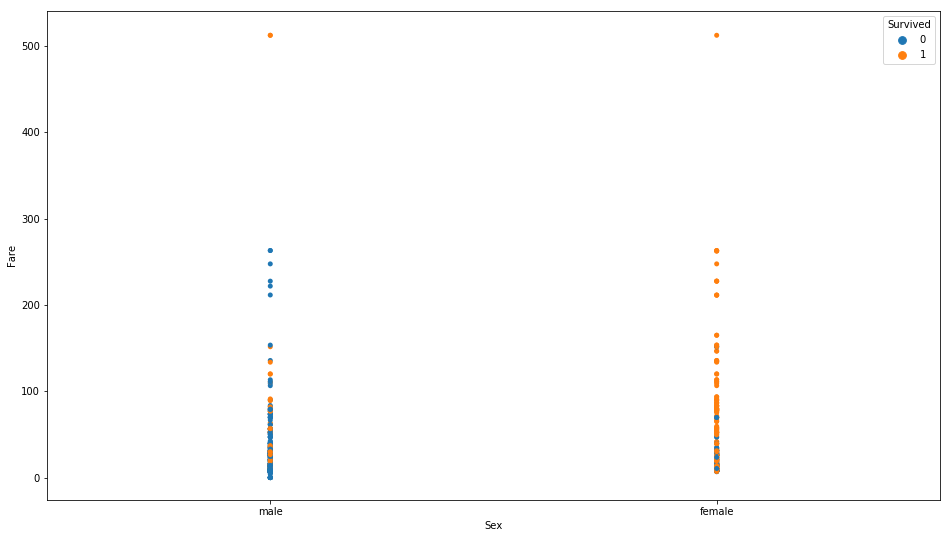

In [39]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))
sns.stripplot(x='Sex', y='Fare', hue='Survived', data=train_data, ax=ax)

### Swarm plot (https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

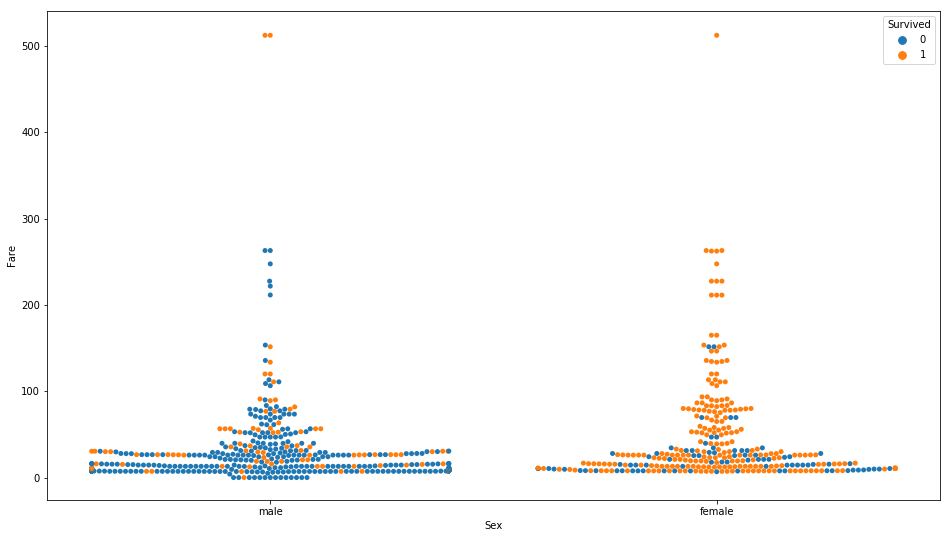

In [40]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=train_data, ax=ax)

### Comments
Great interplay between Fare, Sex and Pclass (and all of them look to be significant as well) !

## Taking a first stab at the data !

In [43]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We decide to impute values for Age and drop Cabin column.

In [44]:
train_data.Ticket.value_counts()

1601               7
347082             7
CA. 2343           7
CA 2144            6
3101295            6
347088             6
S.O.C. 14879       5
382652             5
2666               4
113760             4
19950              4
W./C. 6608         4
347077             4
349909             4
PC 17757           4
LINE               4
113781             4
17421              4
4133               4
PC 17755           3
F.C.C. 13529       3
C.A. 31921         3
110152             3
PC 17760           3
239853             3
24160              3
PC 17572           3
363291             3
13502              3
230080             3
                  ..
14312              1
228414             1
SC/PARIS 2146      1
2669               1
C.A. 5547          1
C.A. 34260         1
334912             1
A/4. 20589         1
113514             1
347468             1
392092             1
5727               1
28228              1
336439             1
345778             1
3101276            1
27042        

In [46]:
train_data[train_data['Ticket'] == "1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [47]:
train_data.loc[[69, 184]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S


### The clever idea 
Since, we see that are multiple people travelling on the same ticket, we come up with a group size field that would take care of the same.
